# Algunos conjuntos de imágenes comunes

A continuación se describen algunos conjuntos de imágenes comúnmente utilizados en ML. Se recomienda usar google scholar para explorar literatura y resultados recientes sobre los mismos; por ejemplo [**MNIST en google scholar.**](https://scholar.google.com/scholar?hl=en&as_sdt=0,5&q=mnist&scisbd=1) Por otro lado, la [lista de conjuntos de datos para investigación en ML de Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research) es un buen punto de partida para explorar más conjuntos de imágenes y otros tipos de datos. Asimismo, algunos portales muy populares como [OpenML](https://www.openml.org), [paperswithcode](https://paperswithcode.com) y [Hugging Face](https://huggingface.co/) facilitan tanto el acceso a conjuntos de datos como a modelos y resultados relacionados.

## MNIST

[**Modified NIST (MNIST)**](http://yann.lecun.com/exdb/mnist) es un corpus de $70\,000$ imágenes $28\times 28$ en gris de dígitos manuscritos; $60\,000$ de training y $10\,000$ de test. Desde su introducción en los 90, MNIST ha sido ampliamente usado como tarea para la comparación de técnicas de ML. Hoy en día se considera una tarea "agotada" pues ya se han alcanzado [tasas de error muy reducidas, por debajo del $0.2\%$.](https://en.wikipedia.org/wiki/MNIST_database#Classifiers)
A continuación leemos MNIST con fetch_openml de sklearn; las primeras $60\,000$ muestras son para training y las $10\,000$ restantes para test.

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


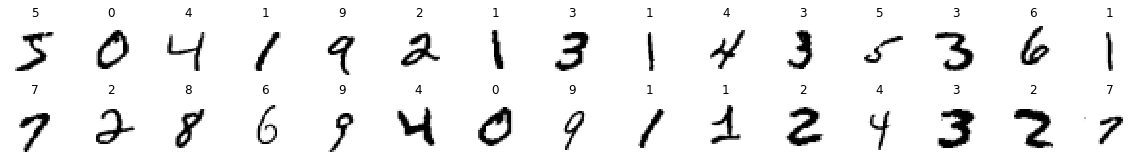

In [2]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(y)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

## EMNIST

[**Extended MNIST (EMNIST)**](https://www.nist.gov/itl/iad/image-group/emnist-dataset) es un corpus de $814\,255$ imágenes $28\times 28$ en gris de 62 caracteres manuscritos ([0-9], [a-z] y [A-Z]). Como su nombre indica, se trata de una extensión de MNIST; de hecho, se publicó en 2017 al constatar que MNIST estaba agotado. Cabe destacar que EMNIST no se presenta como un único conjunto de imágenes, sino como una colección de 6 conjuntos o tareas distintas: 
* Balanced: $814\,255$ caracteres, $47$ clases balanceadas
* ByClass: $814\,255$ caracteres, $62$ clases no balanceadas
* ByMerge:  $814\,255$ caracteres, $47$ clases no balanceadas
* Digits: $280\,000$ caracteres, $10$ clases balanceadas
* Letters: $145\,600$ caracteres, $26$ clases balanceadas
* MNIST: $70\,000$ caracteres, $10$ clases balanceadas

A continuación empleamos el [librería python emnist](https://pypi.org/project/emnist) para leerlo.

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples, extract_test_samples
dataset = 'byclass'
X_train, y_train = extract_training_samples(dataset)
X_test, y_test = extract_test_samples(dataset)
print(dataset, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

byclass (697932, 28, 28) (697932,) (116323, 28, 28) (116323,)


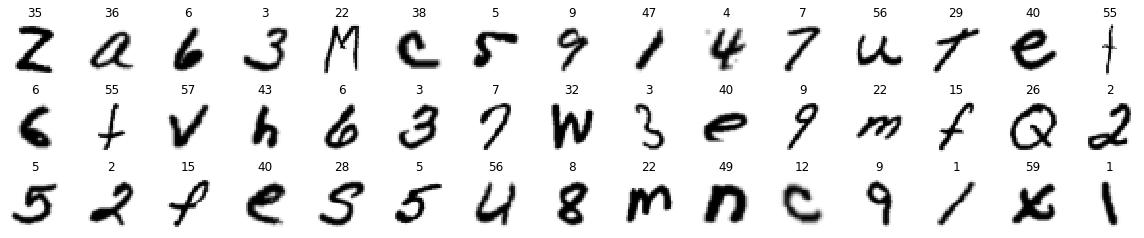

In [5]:
import matplotlib.pyplot as plt
nrows = 3; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); ax.set_title(f"{y}"); ax.imshow(x, cmap=plt.cm.gray_r, interpolation="none")

## Fashion-MNIST

[**Fashion-MNIST**](https://github.com/zalandoresearch/fashion-mnist) es un corpus de $70\,000$ imágenes $28\times 28$ en gris de 10 prendas de ropa; $60\,000$ de training y $10\,000$ de test. Su formato es idéntico a MNIST pues, al igual que EMNIST, se publicó en 2017 como tarea continuadora de la ya agotada MNIST.

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
fashion_mnist_X, fashion_mnist_y = fetch_openml('Fashion-MNIST', return_X_y=True, as_frame=False, parser='auto')
X_train = fashion_mnist_X[:60000].astype(np.float32); y_train = fashion_mnist_y[:60000].astype(np.uint8)
X_test = fashion_mnist_X[60000:].astype(np.float32); y_test = fashion_mnist_y[60000:].astype(np.uint8)
labels = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


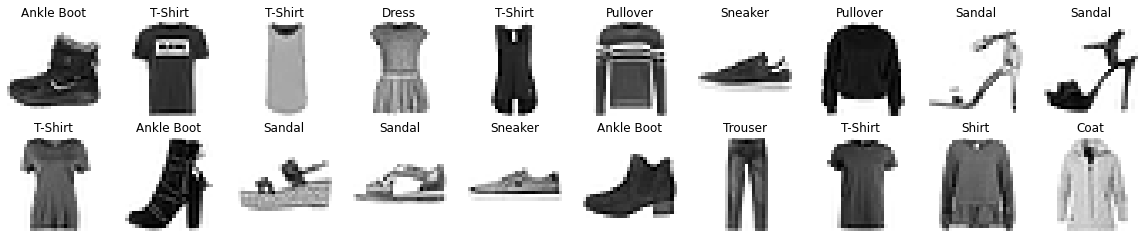

In [7]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(labels[y])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

## CIFAR-10 y CIFAR-100

[**CIFAR-10**](https://www.cs.toronto.edu/~kriz/cifar.html) es un corpus de $60\,000$ imágenes $32\times 32$ a color de 10 clases, con $6\,000$ imágenes por clase; $50\,000$ de training y $10\,000$ de test. [**CIFAR-100**](https://www.cs.toronto.edu/~kriz/cifar.html) es como CIFAR-10, salvo que comprende 100 clases, con $600$ imágenes por clase.

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_10_X, cifar_10_y = fetch_openml('CIFAR_10', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_10_X[:50000]; y_train = cifar_10_y[:50000].astype('uint8')
X_test = cifar_10_X[50000:]; y_test = cifar_10_y[50000:].astype('uint8')
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


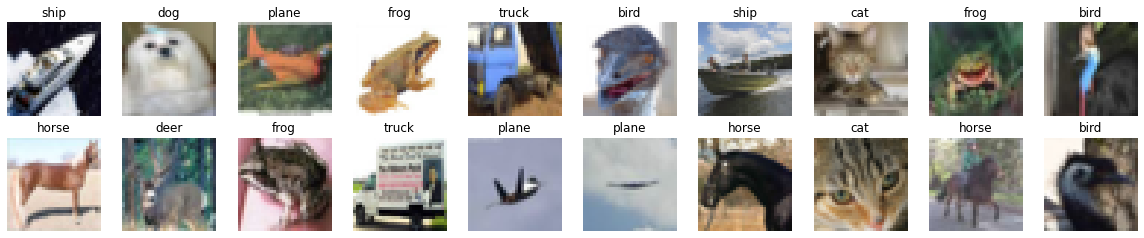

In [9]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); ax.set_title(labels[y])
    ax.imshow(image, interpolation="none")

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_100_X, cifar_100_y = fetch_openml('CIFAR-100', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_100_X[:50000]; y_train = cifar_100_y[:50000].astype('uint8')
X_test = cifar_100_X[50000:]; y_test = cifar_100_y[50000:].astype('uint8')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [11]:
fine_labels = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee',
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish',
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange',
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
    'willow_tree', 'wolf', 'woman', 'worm')
coarse_labels = ('aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 
    'household electrical device', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things',
    'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates',
    'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2')
fine2coarse = (4, 1, 14, 8, 0, 6, 7, 7, 18, 3, 3, 14, 9, 18, 7, 11, 3, 9, 7, 11, 6, 11, 5, 10, 7, 6, 13, 15, 3, 15,
    0, 11, 1, 10, 12, 14, 16, 9, 11, 5, 5, 19, 8, 8, 15, 13, 14, 17, 18, 10, 16, 4, 17, 4, 2, 0, 17, 4, 18, 17, 10,
    3, 2, 12, 12, 16, 12, 1, 9, 19, 2, 10, 0, 1, 16, 12, 9, 13, 15, 13, 16, 19, 2, 4, 6, 19, 5, 5, 8, 19, 18, 1, 2,
    15, 6, 0, 17, 8, 14, 13)

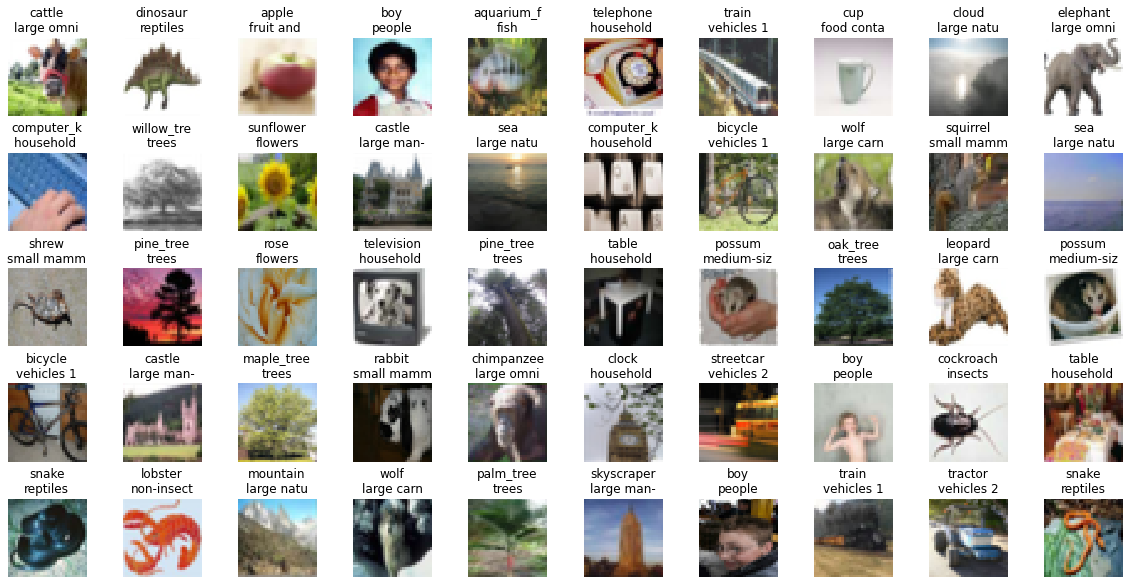

In [12]:
import matplotlib.pyplot as plt
nrows = 5; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); 
    ax.set_title(fine_labels[y][:10]+ "\n" + coarse_labels[fine2coarse[y]][:10])
    ax.imshow(image, interpolation="none")

## ImageNet

**ImageNet** se compone de 14M imágenes $256\times 256\times 3$ de objetos de 20K clases.
